In [1]:
#Fetch Imports for graph utilities

from dgl.data import MiniGCDataset
import dgl
import matplotlib.pyplot as plt
import networkx as nx
from utils.utils import get_label_mapping, plot_samples, perturb_and_visualize
import numpy as np

#state is the init labels
#state' is the perturbed labels
#a is the action that transitions from s to s'

#state is the initial set of graph
#state' is the perturbed set of graphs

Using backend: pytorch


In [61]:
import torch
from utils.data import get_dataset

train,test,classes = get_dataset('ptc_fm')
# torch.Tensor.float()


G = train.graphs
mean = [torch.Tensor.float(i.in_degrees()).mean() for i in G]  # mean
maxi = [torch.Tensor.float(i.in_degrees()).max() for i in G]  # max
mini = [torch.Tensor.float(i.in_degrees()).min() for i in G]  # min
# assume that the state of the system can be deduced from summary stats
state = torch.cat((torch.Tensor(mean), torch.Tensor(maxi), torch.Tensor(mini)))

len(state)

len(torch.zeros(len(G) * 3))

1047

In [22]:
import pandas as pd
df = pd.read_csv('data/logging.log', sep= ';')
df
# df.groupby([' DATASET', 'METHOD', ' POISON_POINTS' ]).mean()


,INFO:root:METHOD,DATASET,POISON_POINTS,RUN_NUMBER,EPISODE,INIT_REWARD,CURRENT_ACCURACY,EPISODIC_REWARD,GRAPH_CLASSES_PERTURBED,EPISODE_ACTIONS
0,"INFO:root:rand, minigc",0.01,0.0,0,0.840,0.642,0.198,"[5, 6, 6, 2, 4]","[3, 2, 0, 0, 1]",NaN
1,"INFO:root:rand, minigc",0.01,0.0,1,0.840,0.666,0.174,"[0, 1, 4, 3, 5]","[2, 3, 2, 3, 1]",NaN
2,"INFO:root:rand, minigc",0.01,0.0,2,0.840,0.634,0.206,"[3, 1, 7, 1, 7]","[2, 3, 2, 1, 0]",NaN
3,"INFO:root:rand, minigc",0.01,0.0,3,0.840,0.678,0.162,"[3, 4, 7, 6, 6]","[2, 0, 2, 2, 0]",NaN
4,"INFO:root:rand, minigc",0.01,0.0,4,0.840,0.642,0.198,"[6, 5, 6, 7, 1]","[1, 3, 3, 1, 0]",NaN
...,...,...,...,...,...,...,...,...,...,...
4267,"INFO:root:rand, imdb",0.01,2.0,67,0.628,0.692,-0.064,"[1, 1, 0, 1, 1, 0, 1, 0, 0, 1]","[1, 0, 0, 3, 3, 1, 2, 0, 3, 3]",NaN
4268,"INFO:root:rand, imdb",0.01,2.0,68,0.628,0.689,-0.061,"[1, 1, 0, 1, 0, 1, 0, 0, 1, 1]","[1, 3, 0, 2, 1, 1, 2, 2, 1, 0]",NaN
4269,"INFO:root:rand, imdb",0.01,2.0,69,0.628,0.690,-0.062,"[1, 1, 0, 1, 0, 1, 1, 1, 0, 0]","[3, 1, 3, 0, 3, 2, 2, 3, 3, 3]",NaN
4270,"INFO:root:rand, imdb",0.01,2.0,70,0.628,0.639,-0.011,"[0, 0, 1, 1, 0, 0, 0, 0, 0, 1]","[3, 3, 3, 0, 3, 1, 0, 1, 0, 2]",NaN


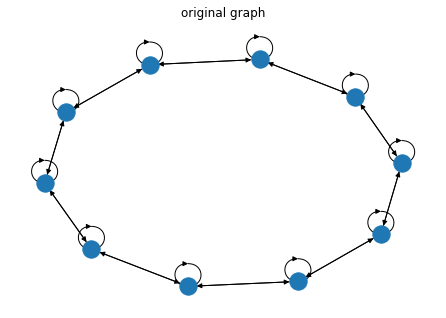

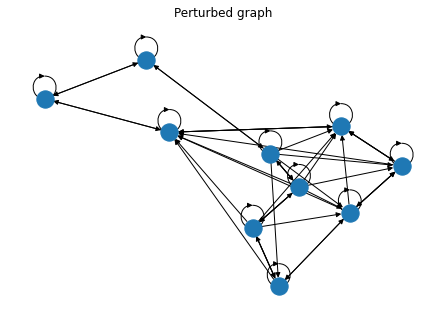

In [2]:
#Load MiniGC Dataset from dgl
#dataset consists of (graph,label) tuples
#and is parameterized by (num_graphs, min_nodes, max_nodes)
#by default class balance. If Ngraphs > Nclasses, a uniform 
#number of graphs are assigned to each class
dataset = MiniGCDataset(120, 10, 20)
x = dataset[1][0]
perturb_and_visualize(x)

tensor([0], dtype=torch.int32)
tensor([1], dtype=torch.int32)
saved to images/dataset.png


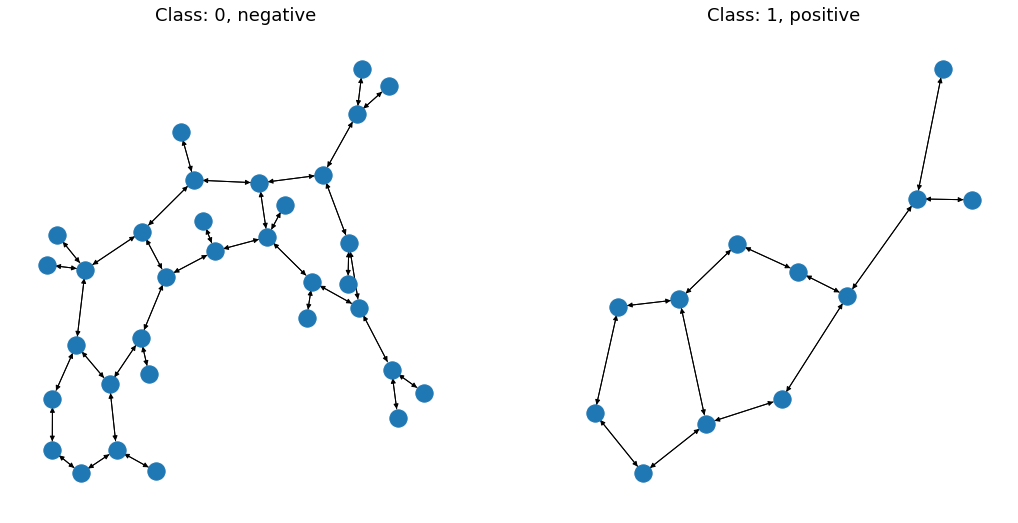

In [3]:
#plot an individual random graph from each class
#along with its numeric class label, label
#Currently: Only supports MiniGCDataset
from dgl.data import MiniGCDataset, TUDataset
dataset = TUDataset("ptc_fm")
plot_samples('ptc', dataset)

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('logs.txt', header = None)
data.columns = ['policy','run', 'episode', 'baseline', 'perturbed', 'reward']
data = data.groupby(['policy', 'episode']).mean().reset_index()
sns.lineplot(data.episode, data.reward, data.policy)
plt.title('Episodic Reward - Averaged over n runs')
plt.show()





EmptyDataError: No columns to parse from file

In [8]:
pd.read_csv('data/logging.log')

ParserError: Error tokenizing data. C error: Expected 13 fields in line 202, saw 18


C:\ProgramData\Anaconda3\envs\adagrad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\adagrad\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\adagrad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)

Text(0.5, 1.0, 'Episodic Reward Density Comparison')

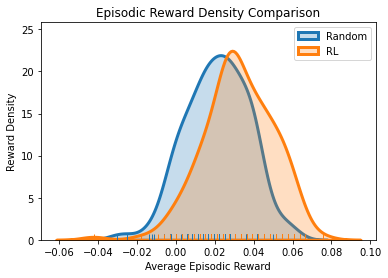

In [6]:

sns.distplot(data[data['policy'] != 'RL']['reward'], hist=False, rug=True, 
             label = 'Random',kde_kws={"lw": 3, "label": "KDE", "shade": True})
sns.distplot(data[data['policy'] == 'RL']['reward'], hist=False, rug=True, label = 'RL',
             kde_kws={"lw": 3, "label": "KDE", "shade": True})
plt.legend()
plt.xlabel('Average Episodic Reward')
plt.ylabel('Reward Density')
plt.title('Episodic Reward Density Comparison')

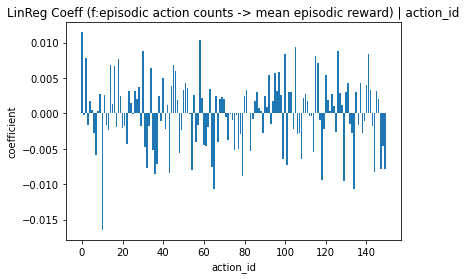

0.8528391802743505


Text(0.5, 0, 'summed coefficients')

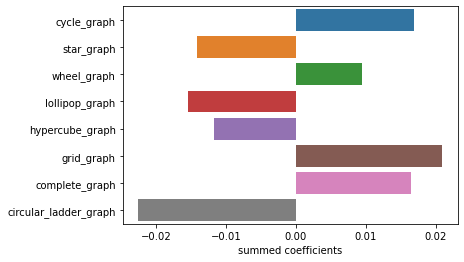

In [8]:
 #run, episode, action
        #run % 2 == 0 is an RL run
        #run % 2 == 1 is a random run
        
with open('action_hist.npy', 'rb') as f:
    a = np.load(f)


from sklearn.linear_model import LinearRegression
rl = np.array([a[i] for i in range(20) if i % 2 == 0])
rand = np.array([a[i] for i in range(20) if i % 2 == 1])


        

data = pd.DataFrame(np.sum(rand, axis = 0)) #action counts per episode summed over run
data = data.reset_index()

y = pd.read_csv('logs.txt', header = None)
y.columns = ['policy','run', 'episode', 'baseline', 'perturbed', 'reward']
y = y[y['policy'] == 'RL']
y = y.groupby('episode').mean()#avg episodic reward over runs
y = y.reset_index()

data['y'] = y['reward']
data = data.iloc[:,1:]
x = np.array(data)[:, :-1]
y = np.array(data)[:, -1]

reg = LinearRegression().fit(x, y)
plt.bar([i for i in range(len(reg.coef_))], reg.coef_)
plt.xlabel('action_id')
plt.ylabel('coefficient')
plt.title('LinReg Coeff (f:episodic action counts -> mean episodic reward) | action_id')
plt.show()
print(reg.score(x, y))
from collections import Counter
test = reg.coef_.argsort()[-7:][::-1]
Counter([np.floor(i / 18.75) for i in test])

e = np.zeros(8)
for i,j in enumerate(reg.coef_):
    class_ = int(np.floor(i / 18.75))
    e[class_] += j

label_names = [
    "cycle_graph",
    "star_graph",
    "wheel_graph",
    "lollipop_graph",
    "hypercube_graph",
    "grid_graph",
    "complete_graph",
    "circular_ladder_graph",
]

sns.barplot(x = e, y = label_names)
plt.xlabel('summed coefficients')